In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [32]:
df = pd.read_csv('data/titanic/train.csv',index_col='PassengerId')

In [34]:
df = pd.concat([df,pd.get_dummies(df['Pclass'], prefix='Pclass')],axis=1)
df.drop(['Pclass'],axis=1,inplace=True)
df = pd.concat([df,pd.get_dummies(df['Sex'], prefix='Sex')],axis=1)
df.drop(['Sex'],axis=1,inplace=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Pclass_1','Pclass_2','Pclass_3', 'Sex_female','Sex_male','Age','Fare']].values, 
    df[['Survived']].values, 
    test_size=0.33)

In [40]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_train =imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [63]:
clf = ensemble.GradientBoostingClassifier(min_samples_leaf=60)
clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

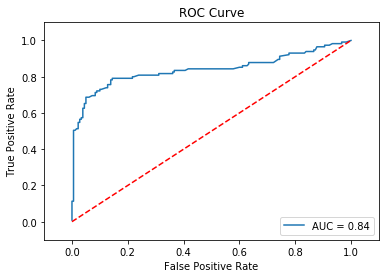

In [64]:
y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [65]:
pd.DataFrame({
    'feature':['Pclass_1','Pclass_2','Pclass_3', 'Sex_female','Sex_male','Age','Fare'],
    'importance':clf.feature_importances_
}).sort_values("importance",ascending=False)

,feature,importance
6,Fare,0.394527
5,Age,0.278655
4,Sex_male,0.114824
3,Sex_female,0.098209
2,Pclass_3,0.070676
0,Pclass_1,0.034127
1,Pclass_2,0.008981


## 